<a href="https://colab.research.google.com/github/bodiwael/AML-Task3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
install the upgraded givernylocal package.
    - n.b. this only needs to be run once.
"""
!pip install --upgrade givernylocal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.6/355.6 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: rpds-py
    Found existing installation: rpds-py 0.22.3
    Uninstalling rpds-py-0.22.3:
      Successfully uninstalled rpds-py-0.22.3
  Attempting uninstall: attrs
    Found existing installation: attrs 24.3.0
    Uninstalling attrs-24.3.0:
      Successfully uninstalled attrs-24.3.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: jsonschema-specifications
    Found ex

In [ ]:
"""
instantiate dataset
"""
from givernylocal.turbulence_dataset import *
from givernylocal.turbulence_toolkit import *

auth_token = 'edu.jhu.pha.turbulence.testing-201406'
dataset_title = 'isotropic1024coarse'
output_path = './giverny_output'

# instantiate the dataset.
dataset = turb_dataset(dataset_title = dataset_title, output_path = output_path, auth_token = auth_token)

In [ ]:
  """
initialize getData parameters (except time and points)
"""
variable = 'velocity'
temporal_method = 'none'
spatial_method = 'lag8'
spatial_operator = 'field'

"""
example point distributions (2D plane, 3D box, random, time series) are provided below...
""";


-----
getData is processing...

total time elapsed = 0.627 seconds (0.010 minutes)

query completed successfully.
-----
num points = 4096

points = 
-
[[0.         0.9        0.        ]
 [0.         0.9        0.00747998]
 [0.         0.9        0.01495997]
 ...
 [1.25663706 0.9        0.45627893]
 [1.25663706 0.9        0.46375892]
 [1.25663706 0.9        0.4712389 ]]

result (1st time index) = 
-
            ux        uy        uz
0     1.192807  0.296407 -0.546726
1     1.060810  0.081739 -0.648234
2     0.944047 -0.162374 -0.701092
3     0.871989 -0.316716 -0.697039
4     0.873195 -0.367088 -0.677313
...        ...       ...       ...
4091  0.322545 -1.185203 -0.334874
4092  0.295089 -1.193692 -0.290453
4093  0.250381 -1.164924 -0.244027
4094  0.216360 -1.128105 -0.200915
4095  0.177240 -1.066927 -0.162902

[4096 rows x 3 columns]



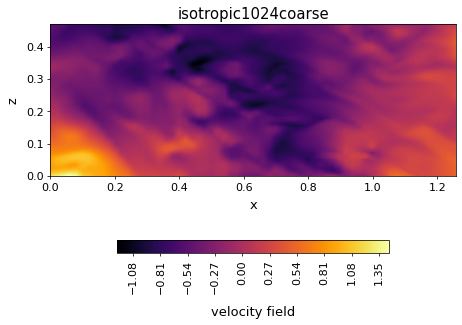

In [ ]:
"""
2D plane demo points : evenly spaced over a 2D plane lying along one of the primary axes
    - time : the time to be queried (snapshot number for datasets without a full time evolution).
    - nx, nz : number of points along each axis. total number of points queried will be n_points = nx * nz.
    - x_points, y_points, z_points : point distributions along each axis, evenly spaced over the specified ranges.
        - np.linspace(axis minimum, axis maximum, number of points).
    - points : the points array evenly spaced out over the 2D plane.
        - points array is instantiated as an empty array that will be filled inside the for loops.
"""
time = 1.0

nx = 64
nz = 64
n_points = nx * nz

x_points = np.linspace(0.0, 0.4 * np.pi, nx, dtype = np.float64)
y_points = 0.9
z_points = np.linspace(0.0, 0.15 * np.pi, nz, dtype = np.float64)

points = np.zeros((n_points, 3), dtype = np.float64)
for i in range(nx):
    for j in range(nz):
        points[i * nz + j, 0] = x_points[i]
        points[i * nz + j, 1] = y_points
        points[i * nz + j, 2] = z_points[j]

"""
use the tools and processing gizmos.
"""
# process interpolation/differentiation of points.
result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)
result_array = np.array(result)  # Convert to NumPy array
result_flat = result_array.reshape(-1, result_array.shape[-1])  # Flatten to [n_points, 3] for 'u', 'v', 'w'
dataf = np.hstack((points, result_flat))

"""
display sample results on screen.
"""
# set threshold for the number of numpy array elements to display.
np.set_printoptions(threshold = 10)

print(f'num points = {len(points)}')
print(f'\npoints = \n-\n{points}')
# the 1st time index of result corresponds to the final time for the "position" variable and the initial time for all other variables.
print(f'\nresult (1st time index) = \n-\n{result[0]}\n')

"""
with result, generate a 2D contour plot.
    - a simple plot to quickly visualize the queried 2D plane.
""";
if nx >= 2 and nz >= 2:
    # user-defined plot parameters.
    # which time of the data to plot (0-based index, so the first time component is specified as 0).
    time_component = 0
    # which component (column) of the data to plot (0-based index, so the first component is specified as 0).
    plot_component = 0

    # reformat 'result' for plotting.
    result_time = result[time_component]
    result_array = np.array(result_time)
    data_plot = np.zeros((nx, nz, len(result_time.columns)), dtype = np.float32)
    x_plot = np.zeros((nx, nz), dtype = np.float64)
    z_plot = np.zeros((nx, nz), dtype = np.float64)

    for i in range(nx):
        for j in range(nz):
            x_plot[i, j] = x_points[i]
            z_plot[i, j] = z_points[j]
            data_plot[i, j, :] = result_array[i * nz + j, :]

    # plot the data.
    fig = plt.figure(figsize = (7, 7), dpi = 67)
    contour = plt.contourf(x_plot, z_plot, data_plot[:, :, plot_component], levels = 500, cmap = 'inferno')
    plt.gca().set_aspect('equal')
    # select the colorbar orientation depending on which axis is larger.
    colorbar_orientation = 'vertical' if (np.max(z_plot) - np.min(z_plot)) >= (np.max(x_plot) - np.min(x_plot)) else 'horizontal'
    cbar = plt.colorbar(contour, shrink = 0.67, orientation = colorbar_orientation)
    # rotate the horizontal colorbar labels.
    if colorbar_orientation == 'horizontal':
        for label in cbar.ax.get_xticklabels():
            label.set_rotation(90)
    cbar.set_label(f'{variable} {spatial_operator}', labelpad = 12, fontsize = 14)
    plt.title(f'{dataset_title}', fontsize = 16)
    plt.xlabel('x', labelpad = 7, fontsize = 14)
    plt.ylabel('z', labelpad = 7, fontsize = 14)
    cbar.ax.tick_params(labelsize = 12)
    plt.tick_params(axis = 'both', labelsize = 12)
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
"""
3D box demo points : evenly spaced over a 3D volume
    - time : the time to be queried (snapshot number for datasets without a full time evolution).
    - nx,ny,nz : number of points along each axis. total number of points queried will be n_points= nx * ny * nz.
    - x_points, y_points, z_points : point distributions along each axis, evenly spaced over the specified ranges.
        - np.linspace(axis minimum, axis maximum, number of points).
    - points : the points array evenly spaced out over the 3D volume.
        - points array is instantiated as an empty array that will be filled inside the for loops.
"""
time = 1.0

nx = 16
ny = 16
nz = 16
n_points = nx * ny * nz

x_points = np.linspace(3.0, 3.3, nx, dtype = np.float64)
y_points = np.linspace(-0.9, -0.6, ny, dtype = np.float64)
z_points = np.linspace(0.2, 0.5, nz, dtype = np.float64)

points = np.zeros((n_points, 3), dtype = np.float64)
for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            points[i * ny * nz + j * nz + k, 0] = x_points[i]
            points[i * ny * nz + j * nz + k, 1] = y_points[j]
            points[i * ny * nz + j * nz + k, 2] = z_points[k]

"""
use the tools and processing gizmos.
"""
# process interpolation/differentiation of points.
result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)

velocity_field = np.array(result).reshape(-1, 3)  # [n_points, 3] for u, v, w


result_array = np.array(result)  # Convert to NumPy array
result_flat = result_array.reshape(-1, result_array.shape[-1])  # Flatten to [n_points, 3] for 'u', 'v', 'w'
dataf = np.hstack((points, result_flat))

"""
display sample results on screen.
"""
# set threshold for the number of numpy array elements to display.
np.set_printoptions(threshold = 10)

print(f'num points = {len(points)}')
print(f'\npoints = \n-\n{points}')
# the 1st time index of result corresponds to the final time for the "position" variable and the initial time for all other variables.
print(f'\nresult (1st time index) = \n-\n{result[0]}\n')

"""
with result, generate a 2D contour plot.
    - a simple plot to quickly visualize the queried 3D volume on a sample plane at y.
""";
if nx >= 2 and ny >= 2 and nz >= 2:
    # user-defined plot parameters.
    # which time of the data to plot (0-based index, so the first time component is specified as 0).
    time_component = 0
    # which component (column) of the data to plot (0-based index, so the first component is specified as 0).
    plot_component = 0

    # reformat 'result' for plotting.
    result_time = result[time_component]
    result_array = np.array(result_time)
    data_plot = np.zeros((nx, ny, nz, len(result_time.columns)), dtype = np.float32)
    x_plot = np.zeros((nx, ny, nz), dtype = np.float64)
    y_plot = np.zeros((nx, ny, nz), dtype = np.float64)
    z_plot = np.zeros((nx, ny, nz), dtype = np.float64)

    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                x_plot[i, j, k] = x_points[i]
                y_plot[i, j, k] = y_points[j]
                z_plot[i, j, k] = z_points[k]
                data_plot[i, j, k, :] = result_array[i * ny * nz + j * nz + k, :]

    # plot the data.
    fig = go.Figure(
        data = go.Volume(
            x = x_plot.flatten(), y = y_plot.flatten(), z = z_plot.flatten(),
            value = data_plot[:, :, :, plot_component].flatten(),
            isomin = data_plot[:, :, :, plot_component].min(),
            isomax = data_plot[:, :, :, plot_component].max(),
            opacity = 0.2, surface_count = 17, colorscale = 'inferno',
            colorbar = dict(
                title = dict(text = f'{variable} {spatial_operator}', side = 'right', font = dict(size = 14)),
                thickness = 15, len = 0.75,
                x = 1.05, y = 0.5, xanchor = 'left', yanchor = 'middle'),
            hovertemplate =
                '<i>x</i> : %{x:.2f}' +
                '<br><i>y</i> : %{y:.2f}' +
                '<br><i>z</i> : %{z:.2f}' +
                '<br><i>value</i> : %{value:.3f}' +
                '<extra></extra>',
            showlegend = False))

    # update figure layout.
    fig.update_layout(
        title = dict(
            text = f'{dataset_title} (click and drag to rotate)', x = 0.5, y = 0.95, xanchor = 'center', yanchor = 'top', font = dict(size = 16)),
        scene = dict(
            xaxis = dict(title = 'x', gridcolor = 'lightgrey', showline = True, linecolor = 'black'),
            yaxis = dict(title = 'y', gridcolor = 'lightgrey', showline = True, linecolor = 'black'),
            zaxis = dict(title = 'z', gridcolor = 'lightgrey', showline = True, linecolor = 'black'),
            aspectmode = 'data',
            camera = dict(eye = dict(x = 1.5, y = 1.5, z = 1.5)),
            bgcolor = 'white'),
        width = 600, height = 600, plot_bgcolor = 'white', paper_bgcolor = 'white',
        showlegend = False)

    fig.show()


-----
getData is processing...

total time elapsed = 16.383 seconds (0.273 minutes)

query completed successfully.
-----
num points = 4096

points = 
-
[[ 3.   -0.9   0.2 ]
 [ 3.   -0.9   0.22]
 [ 3.   -0.9   0.24]
 ...
 [ 3.3  -0.6   0.46]
 [ 3.3  -0.6   0.48]
 [ 3.3  -0.6   0.5 ]]

result (1st time index) = 
-
            ux        uy        uz
0     1.027012  0.969773 -0.634072
1     1.118085  0.857593 -0.694836
2     0.998839  0.767997 -0.666706
3     0.841383  0.794503 -0.534408
4     0.572717  0.986338 -0.528130
...        ...       ...       ...
4091  0.640348  1.032632 -0.343684
4092  0.692155  0.969482 -0.339469
4093  0.707611  0.946097 -0.288020
4094  0.695966  0.972126 -0.196945
4095  0.667787  1.106660 -0.104770

[4096 rows x 3 columns]



In [ ]:
# Model Constants
C_mu = 0.09
C_epsilon_1 = 1.44
C_epsilon_2 = 1.92
C_epsilon_3 = 0.09
rho = 1.0  # Assuming fluid density (adjust based on your case)

# Initialize fields for k, epsilon, and turbulent viscosity
n_points = 4096  # Number of points (adjust as needed)
k = np.zeros((n_points,))  # Turbulent kinetic energy (1D array for simplicity here)
epsilon = np.zeros((n_points,))  # Dissipation rate (1D array)
mu_t = np.zeros((n_points,))  # Turbulent viscosity (1D array)


# Placeholder function to compute turbulent production (P_k)
def compute_turbulent_production(velocity_field):
    # P_k is generally computed based on the gradients of the velocity field
    # For simplicity, let's assume it depends on the velocity gradients
    return np.gradient(velocity_field)  # This is a simplified example


In [ ]:
times = np.arange(0, 10, 0.1)  # Time steps for the simulation
delta_t = 0.1  # Time step size


In [ ]:
columns = ['x', 'y', 'z', 'u', 'v', 'w']
df = pd.DataFrame(dataf, columns=columns)

# Feature Engineering: Compute velocity magnitude
df['velocity_magnitude'] = np.sqrt(df['u']**2 + df['v']**2 + df['w']**2)
print(df.head())

     x    y     z         u         v         w  velocity_magnitude
0  3.0 -0.9  0.20  1.027012  0.969773 -0.634072            1.548309
1  3.0 -0.9  0.22  1.118085  0.857593 -0.694836            1.571107
2  3.0 -0.9  0.24  0.998839  0.767997 -0.666706            1.425481
3  3.0 -0.9  0.26  0.841383  0.794503 -0.534408            1.274658
4  3.0 -0.9  0.28  0.572717  0.986338 -0.528130            1.256897


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define features (inputs) and target (outputs)
X = df[['x', 'y', 'z', 'u', 'v', 'w']].values
y = df['velocity_magnitude'].values  # Replace with turbulence closure targets if needed

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [ ]:
len(X_train)

3276

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0830 - mae: 0.2210 - val_loss: 0.0046 - val_mae: 0.0536
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - mae: 0.0381 - val_loss: 0.0011 - val_mae: 0.0252
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0450e-04 - mae: 0.0223 - val_loss: 7.0474e-04 - val_mae: 0.0211
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1121e-04 - mae: 0.0177 - val_loss: 4.5329e-04 - val_mae: 0.0166
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4565e-04 - mae: 0.0145 - val_loss: 3.3225e-04 - val_mae: 0.0136
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9582e-04 - mae: 0.0129 - val_loss: 2.7281e-04 - val_mae: 0.0123
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4689e-04 - mae: 0.0117 - val_loss: 2.2735e-04 - val_mae: 0.0114
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0504e-04 - mae: 0.0106 - val_loss: 2.2434e-04 - val_mae: 0.0110
Epoch 9/50
82/82 ━━━━━━━

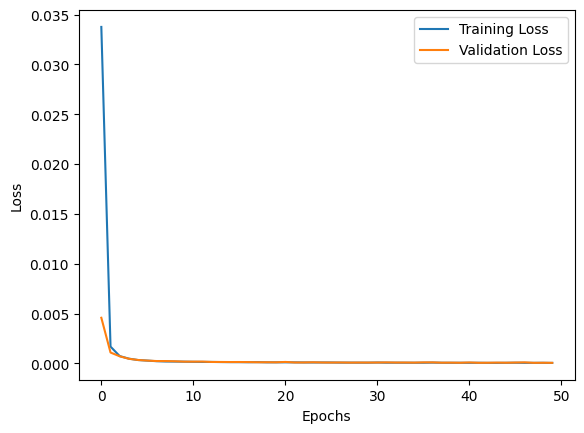

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Predicting a scalar value (e.g., velocity magnitude or closure)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 0.00010788808713244482
R² Score: 0.9981279111376185


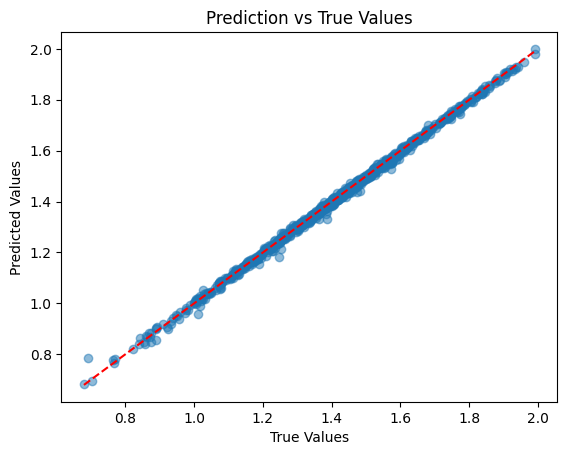

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict and inverse-transform predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Scatter plot of predictions vs true values
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs True Values')
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Volume(
    x=df['x'], y=df['y'], z=df['z'],
    value=df['velocity_magnitude'],
    isomin=df['velocity_magnitude'].min(),
    isomax=df['velocity_magnitude'].max(),
    opacity=0.2, surface_count=20, colorscale='Inferno'
))
fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()


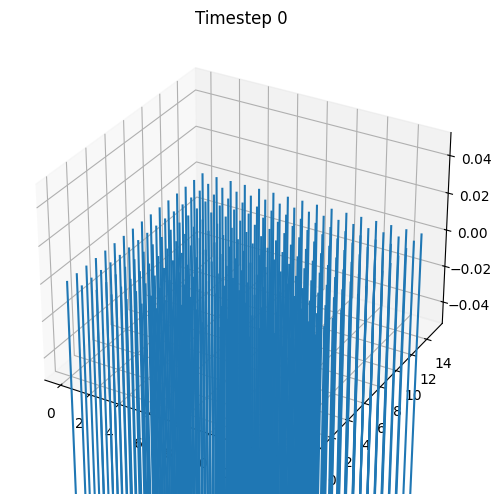

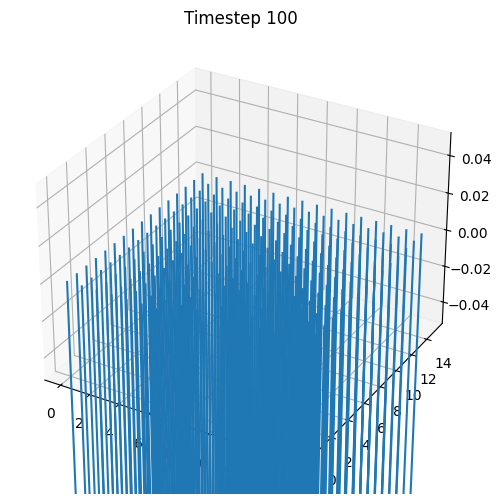

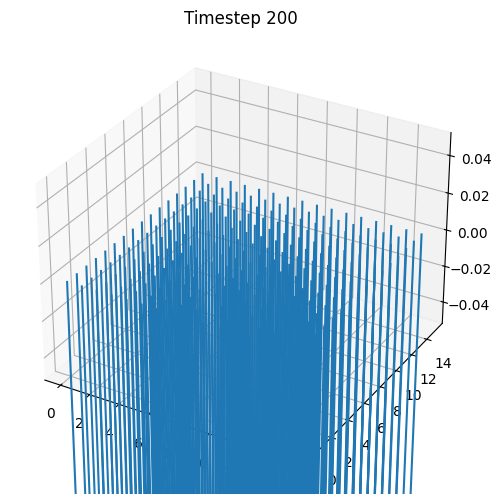

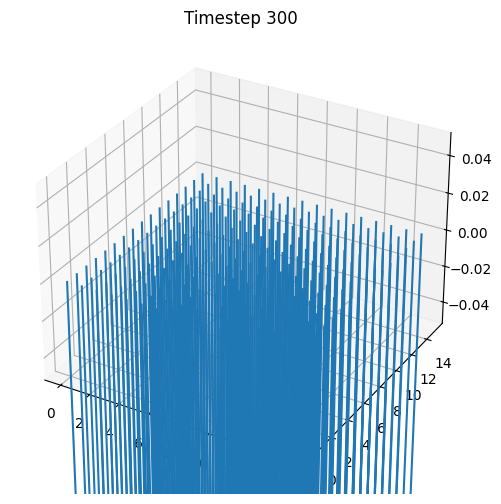

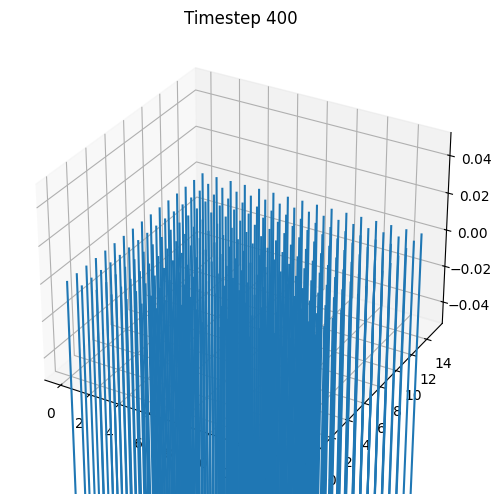

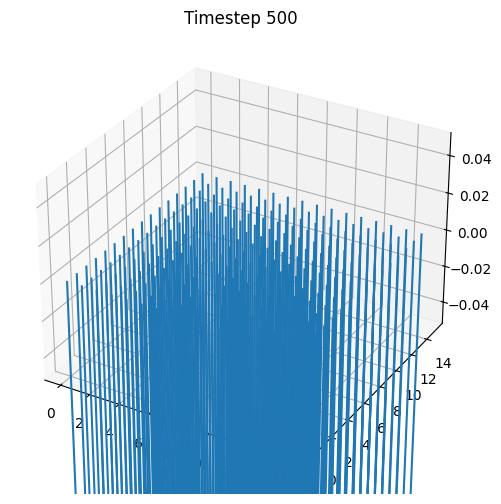

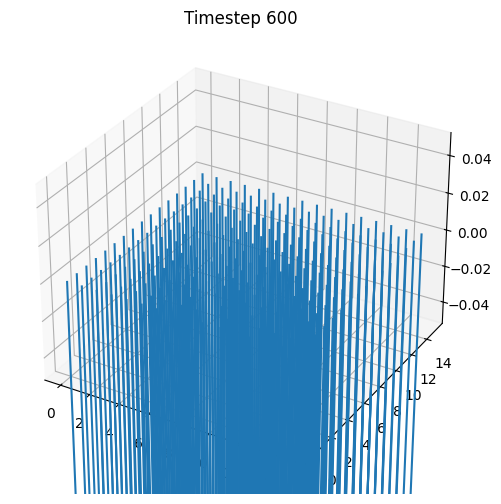

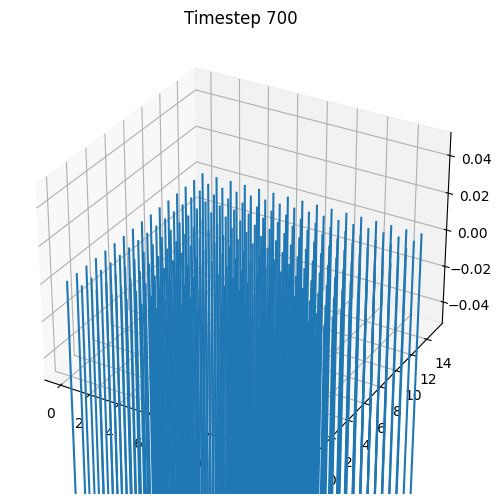

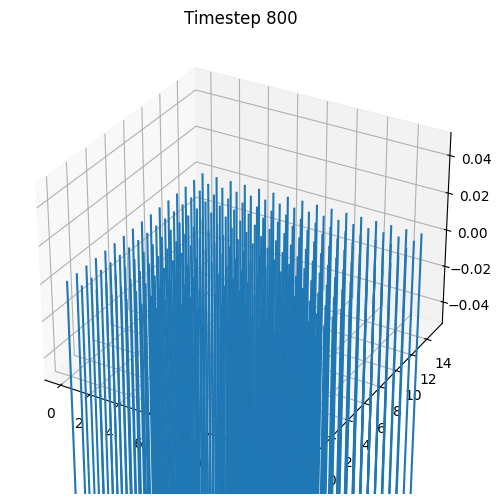

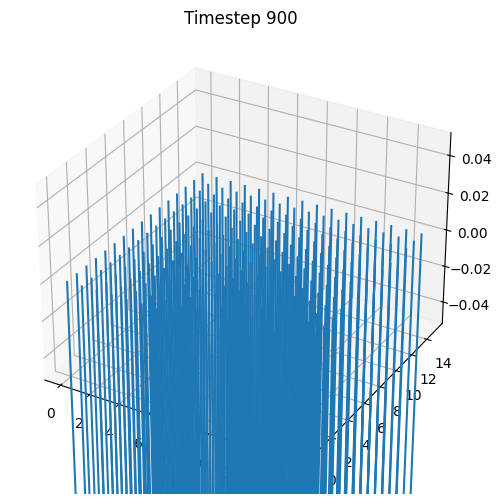

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame with 'x', 'y', 'z' columns
# For example:
# df = pd.DataFrame({'x': np.random.rand(4096), 'y': np.random.rand(4096), 'z': np.random.rand(4096)})

def smagorinsky_sgs(u, v, w, dx, dy, dz, Cs=0.1):
    """
    Smagorinsky subgrid-scale (SGS) model for LES.

    Parameters:
        u, v, w: Velocity components in x, y, and z directions
        dx, dy, dz: Grid spacing in x, y, and z directions
        Cs: Smagorinsky constant (default = 0.1)

    Returns:
        SGS stress tensor
    """
    du_dx = (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0)) / (2*dx)
    dv_dy = (np.roll(v, -1, axis=1) - np.roll(v, 1, axis=1)) / (2*dy)
    dw_dz = (np.roll(w, -1, axis=2) - np.roll(w, 1, axis=2)) / (2*dz)

    strain_rate = np.sqrt(du_dx**2 + dv_dy**2 + dw_dz**2)

    # Compute the SGS stress tensor (Smagorinsky model)
    tau_ij = -Cs * (dx * dy * dz)**(2/3) * strain_rate

    return tau_ij

def les_solver(u, v, w, p, dx, dy, dz, nu, Cs=0.1):
    """
    Solves the Navier-Stokes equations with LES, using a Smagorinsky SGS model.

    Parameters:
        u, v, w: Velocity components in x, y, and z directions
        p: Pressure field
        dx, dy, dz: Grid spacing in x, y, and z directions
        nu: Kinematic viscosity of the fluid
        Cs: Smagorinsky constant (default = 0.1)

    Returns:
        Updated velocity components and pressure field
    """
    # Apply the Smagorinsky SGS model
    tau_ij = smagorinsky_sgs(u, v, w, dx, dy, dz, Cs)

    # Placeholder for actual LES implementation of Navier-Stokes equations
    # Include terms like advection, diffusion, and the SGS stress tensor

    # Simple diffusion term for velocity (example)
    u_new = u + nu * (np.roll(u, 1, axis=0) - 2 * u + np.roll(u, -1, axis=0)) / dx**2
    v_new = v + nu * (np.roll(v, 1, axis=1) - 2 * v + np.roll(v, -1, axis=1)) / dy**2
    w_new = w + nu * (np.roll(w, 1, axis=2) - 2 * w + np.roll(w, -1, axis=2)) / dz**2

    # Add SGS stress (this is simplified for demonstration)
    u_new += tau_ij
    v_new += tau_ij
    w_new += tau_ij

    # Pressure update (simplified for example)
    p_new = p

    return u_new, v_new, w_new, p_new

# Parameters for LES
nu = 1e-6  # Kinematic viscosity
timesteps = 1000  # Number of time steps

# Grid dimensions
nx, ny, nz = 16, 16, 16  # Grid size
dx, dy, dz = 0.01, 0.01, 0.01  # Grid spacing in each direction

# Initialize velocity and pressure fields using values from df

# Assuming df has columns 'x', 'y', 'z' with shape (n_points, )
n_points = len(df)

# Initialize u, v, w from df values
u = np.zeros((nx, ny, nz))
v = np.zeros((nx, ny, nz))
w = np.zeros((nx, ny, nz))

# Reshape df['x'], df['y'], df['z'] to match the grid dimensions
x_values = np.reshape(df['x'].values, (nx, ny, nz))
y_values = np.reshape(df['y'].values, (nx, ny, nz))
z_values = np.reshape(df['z'].values, (nx, ny, nz))

# Assign initial velocity components using some function of x, y, z from the DataFrame
u = np.sin(x_values) * np.cos(y_values)  # Example velocity field
v = np.cos(x_values) * np.sin(z_values)  # Example velocity field
w = np.sin(y_values) * np.cos(z_values)  # Example velocity field

# Initialize pressure field (using any function of x, y, z from df)
p = np.sin(x_values) + np.cos(y_values) + np.sin(z_values)

# Perform LES simulation (iterative process)
for t in range(timesteps):
    u, v, w, p = les_solver(u, v, w, p, dx, dy, dz, nu)

    # Optionally visualize or store results at each timestep
    if t % 100 == 0:
        # Plot the velocity vectors at the first slice (z=0)
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Create grid for quiver plot
        X, Y = np.meshgrid(np.linspace(0, nx-1, nx), np.linspace(0, ny-1, ny))
        U = u[:, :, 0]  # Get velocity component u at z=0
        V = v[:, :, 0]  # Get velocity component v at z=0
        W = w[:, :, 0]  # Get velocity component w at z=0

        # Create a 3D quiver plot
        ax.quiver(X, Y, np.zeros_like(X), U, V, W)
        plt.title(f'Timestep {t}')
        plt.show()

# Further analysis or plotting based on the final u, v, w, and p fields
